In [1]:
import sys
sys.path.append("..")
import Templates.tools.multivariate as mv
import seaborn as sns
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/apps/user/gpy/envs/dev/GPUy310pascal/lib/python3.10/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/apps/user/gpy/envs/dev/GPUy310pascal/lib/python3.10/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (


In [2]:
adata = sc.read_h5ad(MV_file)

In [ ]:
adata

In [ ]:
key_uns = embeddings_key.split("_",1)[-1]

In [ ]:
if key_uns in ["pca_sphered","pca_sphered_Norm"]:
    centering = False
else:
    centering = True

In [ ]:
if transcriptoprint:
    A = list(mv.common_genes(key_uns, path))
    A.append("NTC")
    bdata = adata[adata.obs["gene_symbol"].isin(A)].copy()
else:
    bdata = adata.copy()

In [3]:
bdata

AnnData object with n_obs × n_vars = 575185 × 36603
    obs: 'Sample', 'Barcode', 'DemuxType_crispr', 'DemuxAssignment_crispr', 'DemuxType_hashing', 'DemuxAssignment_hashing', 'cellline', 'timepoint', 'HTO', 'NGS_ID', 'Biological_replicate', '10Xrun', 'sublibrary', 'gRNA_library_MOI', 'gene_symbol', 'class', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'qc_pass', 'S_score', 'G2M_score', 'phase', 'SCN_class'
    var: 'ID', 'Symbol', 'Type'
    uns: 'DemuxAssignment_hashing_colors', 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'energy_distance', 'leiden_colors', 'neighbors', 'umap'
    obsm: 'X_harmony', 'X_harmony_centered', 'X_pca', 'X_pca_centered', 'X_scVI', 'X_scVI_centered', 'X_umap'
    layers: 'X', 'counts', 'log_norm'
    obsp: 'connectivities', 'distances'

In [4]:
bdata.obs

,Sample,Barcode,DemuxType_crispr,DemuxAssignment_crispr,DemuxType_hashing,DemuxAssignment_hashing,cellline,timepoint,HTO,NGS_ID,...,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,qc_pass,S_score,G2M_score,phase,SCN_class
SAM24439046_rep1-AAACCCAAGACCACGA,SAM24439046,AAACCCAAGACCACGA,singlet,ENSG00000172538_2,singlet,SAM24439045,DLD1,day5,HTO-7,NGS5446,...,11177,321,2.871969,2726,24.389371,True,-1.153488,0.548774,G2M,Untreatedclus_DLD1
SAM24439046_rep1-AAACCCAAGAGTGGCT,SAM24439046,AAACCCAAGAGTGGCT,singlet,ENSG00000213337_2,singlet,SAM24439043,DLD1,day5,HTO-1,NGS5446,...,14449,155,1.072739,4173,28.880891,True,-0.860465,-0.474961,G1,Untreatedclus_DLD1
SAM24439046_rep1-AAACCCAAGCACTCAT,SAM24439046,AAACCCAAGCACTCAT,singlet,ENSG00000184445_4,singlet,SAM24439044,DLD1,day5,HTO-13,NGS5446,...,5755,100,1.737619,1623,28.201564,True,-0.600000,-0.573813,G1,Untreatedclus_DLD1
SAM24439046_rep1-AAACCCAAGCTCGGCT,SAM24439046,AAACCCAAGCTCGGCT,singlet,ENSG00000145536_1,singlet,SAM24439045,DLD1,day5,HTO-18,NGS5446,...,8004,366,4.572714,2114,26.411794,True,-0.981395,-0.338289,G1,Untreatedclus_DLD1
SAM24439046_rep1-AAACCCAAGGGCAATC,SAM24439046,AAACCCAAGGGCAATC,singlet,ENSG00000119725_1,singlet,SAM24439045,DLD1,day5,HTO-18,NGS5446,...,12772,145,1.135296,3060,23.958660,True,-1.153488,-1.282212,G1,Untreatedclus_DLD1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAM24426528_Replicate1-TTTGTTGTCGTCTCAC-1,SAM24426528,TTTGTTGTCGTCTCAC-1,singlet,ENSG00000127616_2,singlet,SAM24426501,DLD1,day5,HTO-2,NGS4907,...,14128,625,4.423839,2940,20.809740,True,-0.413778,0.433304,G2M,Untreatedclus_DLD1
SAM24426528_Replicate1-TTTGTTGTCTAGTACG-1,SAM24426528,TTTGTTGTCTAGTACG-1,singlet,ENSG00000125648_3,singlet,SAM24426501,DLD1,day5,HTO-14,NGS4907,...,13827,281,2.032256,2753,19.910320,True,-0.801119,1.370660,G2M,Untreatedclus_DLD1
SAM24426528_Replicate1-TTTGTTGTCTATGTGG-1,SAM24426528,TTTGTTGTCTATGTGG-1,singlet,ENSG00000157741_2,singlet,SAM24426501,DLD1,day5,HTO-6,NGS4907,...,9867,412,4.175535,1967,19.935137,True,0.150176,0.389034,G2M,Untreatedclus_DLD1
SAM24426528_Replicate1-TTTGTTGTCTGGCCGA-1,SAM24426528,TTTGTTGTCTGGCCGA-1,singlet,ENSG00000136940_4,singlet,SAM24426501,DLD1,day5,HTO-8,NGS4907,...,11344,479,4.222496,2421,21.341678,True,-0.635366,-0.027344,G1,Untreatedclus_DLD1


In [5]:
perturbations_key = "gene_symbol"
gene_graph, gene_sets = mv.enrichr_to_gene_graph("./Templates/data/CORUM.txt", np.array(bdata.obs[perturbations_key].values))

In [6]:
embeddings_obj = mv.AnnDataEmbeddings(bdata, embeddings_key, perturbations_key, "Sample", "NTC")
perturbation_embeddings = embeddings_obj.get_embeddings_from_list(list(gene_graph), agg=True, centering = centering)

In [7]:
perturbation_embeddings.shape

(507, 40)

Performing Kolmogorov-Smirnov test on gene set cosine similarity..
KS statistic: 0.05189873417721519, p-value: 0.23788157445136


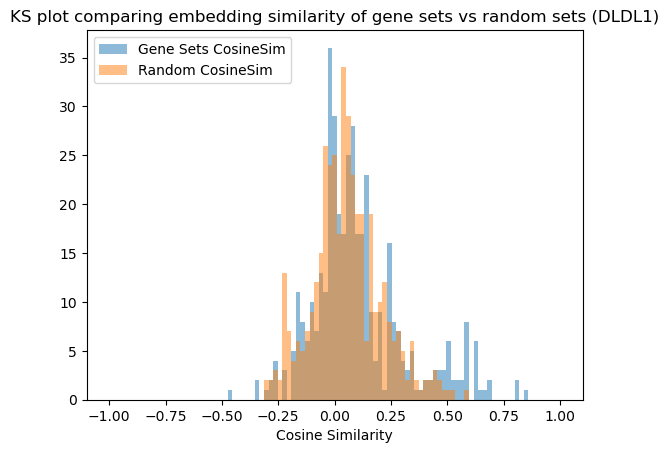

Computing distance matrix for embeddings..
Computing link prediction metrics for cutoff percentile=0%
Computing link prediction metrics for cutoff percentile=1%
Computing link prediction metrics for cutoff percentile=2%
Computing link prediction metrics for cutoff percentile=3%
Computing link prediction metrics for cutoff percentile=4%
Computing link prediction metrics for cutoff percentile=5%
Computing link prediction metrics for cutoff percentile=6%
Computing link prediction metrics for cutoff percentile=7%
Computing link prediction metrics for cutoff percentile=8%
Computing link prediction metrics for cutoff percentile=9%
Computing link prediction metrics for cutoff percentile=10%
Computing link prediction metrics for cutoff percentile=11%
Computing link prediction metrics for cutoff percentile=12%
Computing link prediction metrics for cutoff percentile=13%
Computing link prediction metrics for cutoff percentile=14%
Computing link prediction metrics for cutoff percentile=15%
Computi

In [8]:
# needs to be cached in embeddings_obj
report = mv.evaluate(perturbation_embeddings, gene_graph, gene_sets, percentile_range=[0, 100])

In [9]:
recalls = [report["metrics_by_percentile"][i]["recall"] for i in report["metrics_by_percentile"]]
precisions = [report["metrics_by_percentile"][i]["precision"] for i in report["metrics_by_percentile"]]
tprs = [report["metrics_by_percentile"][i]["TPR"] for i in report["metrics_by_percentile"]]
fprs = [report["metrics_by_percentile"][i]["FPR"] for i in report["metrics_by_percentile"]]

In [10]:
report["metrics_by_percentile"][95]

{'recall': 0.2458816351433801,
 'precision': 0.03198412698412698,
 'f1_score': 0.0566050986726596,
 'TPR': 0.2458816351433801,
 'FPR': 0.0963184661065134}

In [11]:
report["metrics_by_percentile"][90]

{'recall': 0.3563148261134838,
 'precision': 0.022945151658022946,
 'f1_score': 0.04311394928204939,
 'TPR': 0.3563148261134838,
 'FPR': 0.19638006191168111}

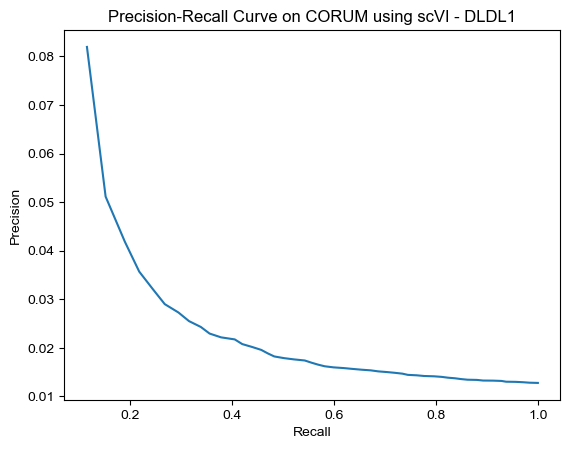

In [12]:
# put plots in a plotting module file
# plots should be generated from embeddings_obj or report
plt.plot(recalls, precisions)
sns.set_color_codes("pastel")
sns.set_theme()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve on CORUM using scVI - DLDL1")
plt.show()

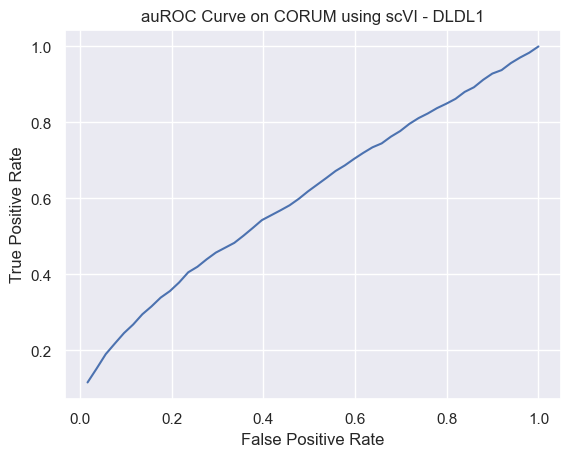

In [13]:
plt.plot(fprs, tprs)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("auROC Curve on CORUM using scVI - DLDL1")
plt.show()

## Update the annadata object and write out the output

In [ ]:
if "multivariate_report" not in bdata.uns:
    bdata.uns["multivariate_report"]={}

In [ ]:
if transcriptoprint==True:
    bdata.uns["multivariate_report"][key_uns]["transcriptoprint"] = {"roc_auc": report["roc_auc"], "auprc": report["auprc"], 
                                    "95percentile":report["metrics_by_percentile"][95], "90percentile":report["metrics_by_percentile"][90]}
else:
    bdata.uns["multivariate_report"][key_uns] = {"roc_auc": report["roc_auc"], "auprc": report["auprc"], 
                                    "95percentile":report["metrics_by_percentile"][95], "90percentile":report["metrics_by_percentile"][90]}

In [ ]:
adata.uns = bdata.uns.copy()

In [16]:
adata.write_h5ad(MV_file)

In [ ]:
adata.uns['multivariate_report'][key_uns]

## Data Tabulation

In [19]:
metrics = pd.DataFrame.from_dict(report["metrics_by_percentile"],orient='index')

In [20]:
metrics["percentile"] = metrics.index

In [21]:
metrics[metrics.percentile>89]

,recall,precision,f1_score,TPR,FPR,percentile
90,0.356315,0.022945,0.043114,0.356315,0.196380,90
91,0.339231,0.024299,0.045349,0.339231,0.176306,91
92,0.316046,0.025503,0.047198,0.316046,0.156303,92
93,0.295302,0.027281,0.049948,0.295302,0.136277,93
94,0.268456,0.029005,0.052353,0.268456,0.116321,94
95,0.245882,0.031984,0.056605,0.245882,0.096318,95
96,0.218426,0.035696,0.061364,0.218426,0.076371,96
97,0.190360,0.041829,0.068587,0.190360,0.056439,97
98,0.152532,0.051146,0.076605,0.152532,0.036626,98
99,0.115924,0.081967,0.096032,0.115924,0.016805,99


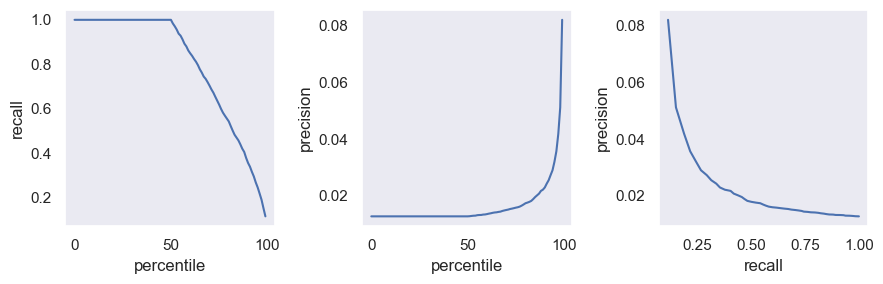

In [22]:
_, axs = plt.subplots(1, 3, figsize=np.array([3, 1]) * 3)
xy = [("percentile", "recall"), ("percentile", "precision"), ("recall", "precision")]
for (x, y), ax in zip(xy, axs.flat):
    ax.plot(metrics[x], metrics[y])
    ax.grid()
    ax.set_xlabel(x)
    ax.set_ylabel(y)
plt.tight_layout()